In [20]:
#FOR ANALYSIS/CLEANING/COMPUTATION:
import pandas as pd
import numpy as np

#FOR VISUALIZATION:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('review_shopping.csv' , delimiter='\t' , names = ['text', 'sentiment'] , header=None) # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.0 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
text         128
sentiment      2
dtype: int64


In [22]:
df['sentiment'].value_counts()

sentiment
neg    68
pos    60
Name: count, dtype: int64

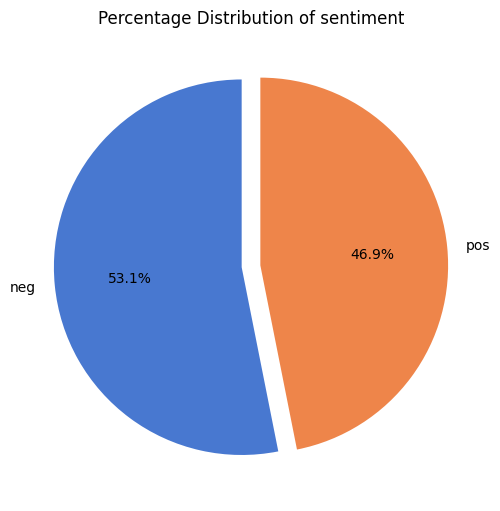

In [23]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['sentiment']
plot_categorical_distributions(columns_to_plot)

In [24]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

In [25]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final


In [26]:
import re
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text)
    text = re.sub(r'[^a-zA-Zก-ฮะ-์\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [27]:
df['text'] = df['text'].apply(clean_text)
df['text_tokens'] = df['text'].apply(text_process)

In [28]:
df.head()

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...


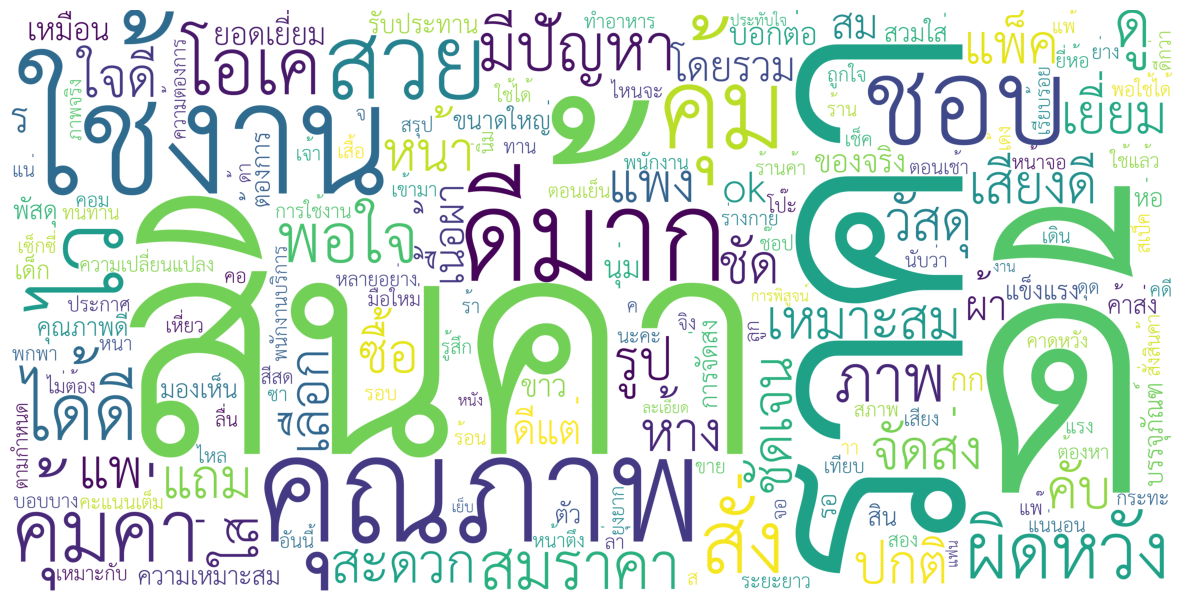

In [29]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

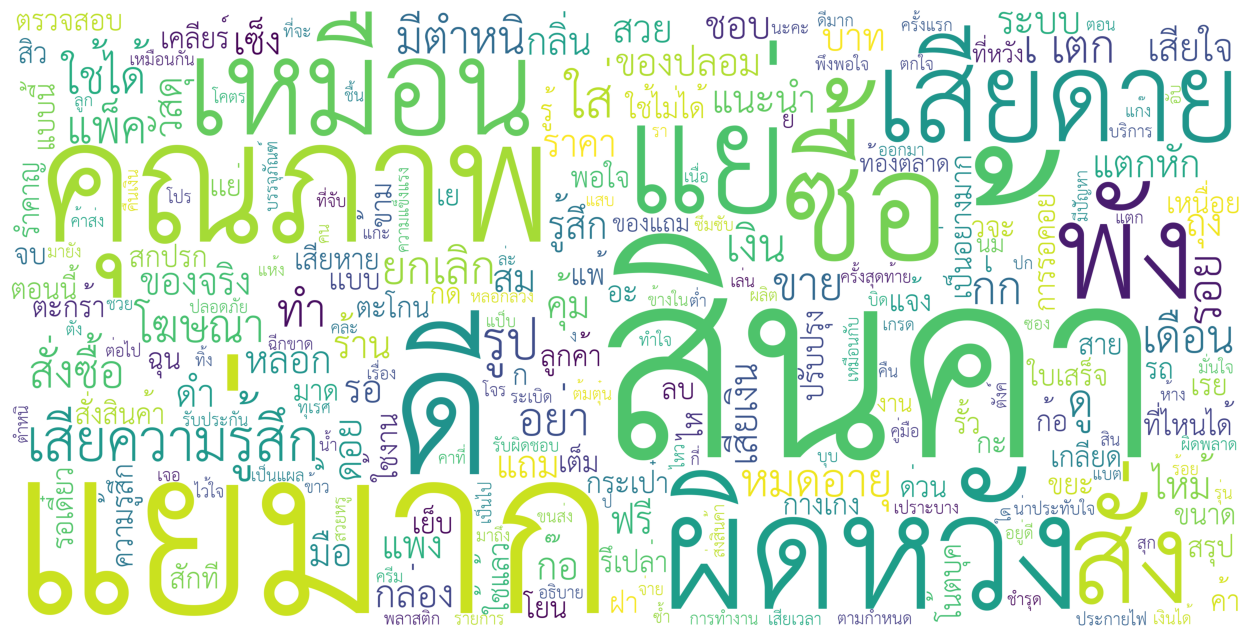

In [30]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'คุณภาพ': 61,
 'คุ้มค่า': 64,
 'ครับ': 40,
 'ไม่': 400,
 'เป็นไป': 313,
 'ตามที่': 114,
 'โฆษณา': 375,
 'ส่งสินค้า': 262,
 'ตรง': 103,
 'ตามกำหนด': 113,
 'เมื่อ': 315,
 'สินค้า': 255,
 'มีปัญหา': 190,
 'รับผิดชอบ': 211,
 'ใด': 389,
 'มี': 188,
 'คู่มือ': 65,
 'แย่มาก': 368,
 'กล่อง': 7,
 'ก็': 19,
 'ใส่': 392,
 'ถุง': 123,
 'มา': 184,
 'ให้': 395,
 'ทุเรศ': 139,
 'มาก': 185,
 'น่าประทับใจ': 149,
 'สรุป': 244,
 'แพง': 361,
 'กว่า': 8,
 'ท้องตลาด': 140,
 'คะ': 52,
 'เสีย': 329,
 'ความ': 47,
 'สั่งซื้อ': 250,
 'แล้ว': 371,
 'อยู่ดี': 278,
 'ยกเลิก': 192,
 'เสียความรู้สึก': 330,
 'เลย': 325,
 'เปราะบาง': 309,
 'ความแข็งแรง': 50,
 'น้อย': 150,
 'มัน': 182,
 'ง่าย': 71,
 'ต่อ': 116,
 'การ': 13,
 'แตกหัก': 352,
 'สวย': 246,
 'ใช้งาน': 385,
 'ที่': 134,
 'สำคัญ': 253,
 'ส่ง': 261,
 'เร็ว': 324,
 'คุณภาพดี': 62,
 'แข็งแรง': 350,
 'เสียงดี': 332,
 'เด็ก': 301,
 'ชอบ': 84,
 'และ': 370,
 'ยัง': 194,
 'ด้วย': 100,
 'ค่ะ': 67,
 'อย่า': 279,
 'สั่ง': 249,
 'นะ': 142,
 'ด้อย': 101,
 'ใช้แล้ว': 386,
 

In [33]:
train_bow = cvec.transform(X_train['text_tokens'])
train_bow_df = pd.DataFrame(train_bow.toarray(), 
                            columns=cvec.get_feature_names_out(),
                            index=X_train['text_tokens'])

In [34]:
train_bow_df.head()

,ok,ก,กก,กด,กระทะ,กระเป๋า,กลิ่น,กล่อง,กว่า,กะ,...,ไม่,ไม่ค่อย,ไม่ต้อง,ไว,ไว้,ไห,ไหนจะ,ไหม้,ไหล,ไหว
text_tokens,,,,,,,,,,,,,,,,,,,,,
คุณภาพ คุ้มค่า ครับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ไม่ เป็นไป ตามที่ โฆษณา ส่งสินค้า ไม่ ตรง ตามกำหนด เมื่อ สินค้า มีปัญหา ไม่ รับผิดชอบ ใด,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
ไม่ มี คู่มือ แย่มาก ครับ กล่อง ก็ ไม่ มี ใส่ ถุง มา ให้ ทุเรศ มาก ครับ,0,0,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,0,0
คุณภาพ สินค้า ไม่ น่าประทับใจ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
สรุป แพง กว่า ท้องตลาด คะ แย่มาก เสีย ความ,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.89      0.89      0.89        18
         pos       0.90      0.90      0.90        21

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



In [37]:
my_text = 'ใช้ดีขนาดนี้'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)